In [2]:
import sys
import pickle
#import photoshop.api as ps
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import shutil
import openpifpaf
import torch
from IPython.display import clear_output

print('OpenPifPaf version', openpifpaf.__version__)

OpenPifPaf version 0.10.1



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\anaconda3\envs\ms_thesis_Env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\anaconda3\envs\ms_thesis_Env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Austin Paulraj\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075

In [3]:
with open('C://Austin//Projects//MS_Thesis_Data//completed_pose_est_dict.pickle', 'rb') as handle:
    complete_pose_est_dict = pickle.load(handle)

df = pd.DataFrame(complete_pose_est_dict)
df.head()

,img_arr,frame,angle,content_source,character_name,og_img,folder_path,pose_keypoints,pose_annotations
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,full,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[70.33253 34.06229 0.83968675], [77....",[<openpifpaf.decoder.annotation.Annotation obj...
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([], [])",[]
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,side,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[26.429058 54.45409 0.5765964], [32.224...",[<openpifpaf.decoder.annotation.Annotation obj...
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[61.584763 77.56881 0.7112104], [75.066...",[<openpifpaf.decoder.annotation.Annotation obj...
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,full,back,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...",[<openpifpaf.decoder.annotation.Annotation obj...


506


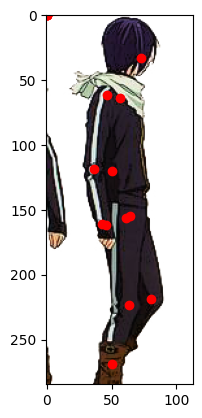

In [4]:
enough_points = []
count = -1
for index, row in df.iterrows():
    clear_output(wait=True)
    count=count+1
    print(count)
    if row["pose_keypoints"][0].shape[0]:
        plt.imshow(row["img_arr"])
        x_points = [x[0] for x in row["pose_keypoints"][0][0]]
        y_points = [x[1] for x in row["pose_keypoints"][0][0]]
        plt.scatter(x_points,y_points, c="red")
        plt.show()
        
        n = input("Enough Points?")
        if n == "0":
            break
        n=int(n)-1
        enough_points.append(n)
    else:
        enough_points.append(-1)

In [11]:
complete_pose_est_dict["Round1_PoseEst_Completion"] = enough_points

In [13]:
with open('C://Austin//Projects//MS_Thesis_Data//first_review_postposeest.pickle', 'wb') as handle:
    pickle.dump(complete_pose_est_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
df = pd.DataFrame(complete_pose_est_dict)
df.head()

,img_arr,frame,angle,content_source,character_name,og_img,folder_path,pose_keypoints,pose_annotations,Round1_PoseEst_Completion
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,full,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[70.33253 34.06229 0.83968675], [77....",[<openpifpaf.decoder.annotation.Annotation obj...,3
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([], [])",[],-1
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,side,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[26.429058 54.45409 0.5765964], [32.224...",[<openpifpaf.decoder.annotation.Annotation obj...,3
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,face,front,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[61.584763 77.56881 0.7112104], [75.066...",[<openpifpaf.decoder.annotation.Annotation obj...,3
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,full,back,One Piece,Monkey D Luffy,0314536300c95193276277e2606f32f9.jpg,C:/Austin/Projects/MS_Thesis_Data/test\0314536...,"([[[0. 0. 0.], [0. 0. 0.], [0. 0. 0.], [0. 0. ...",[<openpifpaf.decoder.annotation.Annotation obj...,0


In [10]:
nothing = 0
only_body = 0
only_face = 0
all = 0
for i in enough_points:
    if i == 3:
        all = all+1
    elif i == 2:
        only_body = only_body+1
    elif i == 1:
        only_face = only_face+1
    elif i == 0 or i == -1:
        nothing = nothing+1

print("All", all)
print("Body",only_body)
print("Face",only_face)
print("Some",only_face+all+only_body)
print("None",nothing)

All 179
Body 10
Face 56
Some 245
None 262
